#### [ 순환 신경망에 데이터셋을 주입하는 두 가지 방법 ]  
: (1) 원-핫 인코딩  
: (2) 단어 임베딩

* 토큰: 영어 문장을 모두 소문자로 바꾸고 구둣점으 삭제한 다음 공백을 기준으로 분리한 것

In [2]:
from keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=200)

2025-11-30 10:20:52.892177: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-30 10:20:52.902870: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-30 10:20:53.007485: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-30 10:20:53.090425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764465653.167770     890 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764465653.19

In [3]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


이 데이터는 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 배열이다.  
넘파이 배열은 정수나 실수가 아닌 다른 파이썬 객체를 담을 수 있다.

In [4]:
print(len(train_input[0]))

218


In [5]:
print(len(train_input[1]))

189


In [6]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


앞서 num_words=200으로 지정하여 어휘 사전에는 200개의 단어만 들음  
어휘 사전에 없는 단어는 모두 `2`로 표시

In [7]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


해결할 문제는 리뷰가 긍정인지 부정인지 판단하는 것으로 `이진 분류` 문제로 볼 수 있음  
: `0(부정)`과 `1(긍정)`으로 나누어짐

In [8]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state =42)

평균적인 리뷰의 길이 + 가장 짧은 리뷰 길이 + 가장 긴 리뷰 길이를 확인하는 방법 ==> 각 리뷰의 길이를 계산해 넘파이 배열에 담기

In [9]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [10]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


평균 단어 개수: 239개  
중간값: 178  
==> 한쪾으로 치우친 분포를 보일 것으로 예상

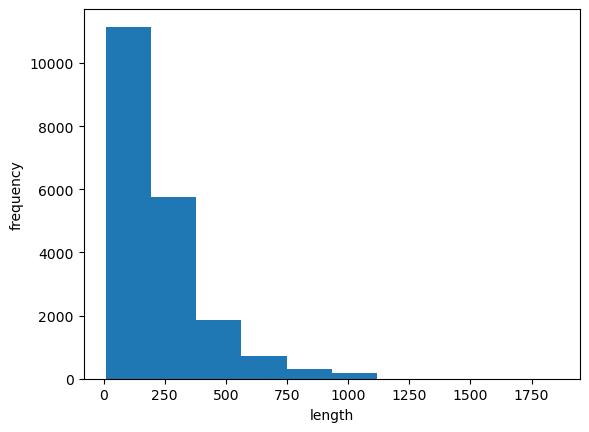

In [11]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [15]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

maxlen에 원하는 길이를 지정 ==> 긴&emsp;경우: 잘라냄  
&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;짧은 경우: 0으로 패딩

In [16]:
print(train_seq.shape)

(20000, 100)


In [17]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [18]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


뒤에서 10개의 토큰을 출력 ==> `train_seq[0]`의 출력값과 비교하면 일치하는 것을 확인 ==> 샘플의 앞부분이 잘렸다는 것을 짐작 가능  

pad_sequences() 함수는 기본으로 maxlen보다 긴 시퀀스의 앞부분을 자름 ==> 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하리라 기대  
: 리뷰 같은 경우 끝에 결정적인 소감이 들어갈 가능성이 높기 때문

In [19]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


앞부분에 0이 있는 것을 확인 ==> 샘플의 길이가 100이 안 됨  
: 패딩 토큰은 시퀀스의 뒷부분이 아니라 앞부분에 추가

In [20]:
val_seq = pad_sequences(val_input, maxlen=100)

#### [ 순환 신경망 만들기 ]

In [21]:
import keras

model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,200)))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

W0000 00:00:1764469880.139300     890 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


SimpleRNN 클래스에 사용할 뉴런의 개수를 지정 ==> activation 매개변수의 기본값은 'tanh'로 하이퍼볼릭 탄젠트 함수 사용  

원-핫 인코딩: 정숫값을 배열에서 해당 정수 위치의 원소만 1이고 나머지는 모두 0으로 변환

In [27]:
# train_seq를 원-핫 인코딩으로 변환

train_oh = keras.utils.to_categorical(train_seq)

In [28]:
print(train_oh.shape)

(20000, 100, 200)


샘플 데이터의 크기가 1차원 (100,)에서 2차원(100, 200)으로 바꾸었으므로 Input함수의 shape 매개변수의 값을 (100, 200)으로 지정

In [ ]:
# 열한 번째 원소가 1인 것을 확인

print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [30]:
# 모두 더했을 때 값이 1이면 인코딩 성공적

print(np.sum(train_oh[0][0]))

1.0


In [31]:
val_oh = keras.utils.to_categorical(val_seq)

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

#### [ 순환 신경망 훈련하기 ]  
: Adam 옵티마이저를 사용  
: 이진 분류 문제이므로 손실 함수로 `binary_crossentropy`를 사용

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5496 - loss: 0.6823 - val_accuracy: 0.6926 - val_loss: 0.5943
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6927 - loss: 0.5911 - val_accuracy: 0.7204 - val_loss: 0.5630
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7166 - loss: 0.5663 - val_accuracy: 0.7214 - val_loss: 0.5554
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7204 - loss: 0.5579 - val_accuracy: 0.7162 - val_loss: 0.5613
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7234 - loss: 0.5528 - val_accuracy: 0.7300 - val_loss: 0.5466
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7271 - loss: 0.5513 - val_accuracy: 0.7212 - val_loss: 0.5536
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7291 - loss: 0.5441 - val_accuracy: 0.6984 - val_loss: 0.5791
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7331 - loss: 0.5423 - 

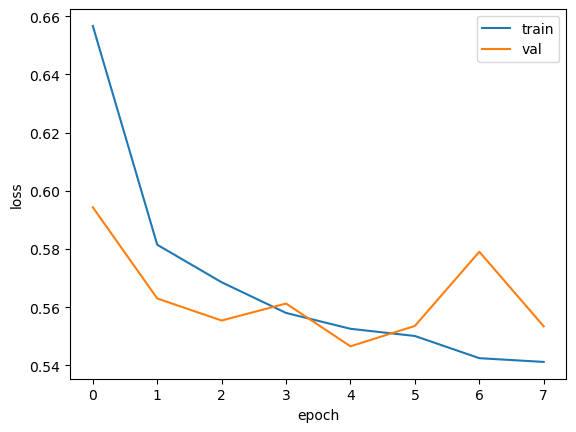

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

* 원-핫 인코딩의 단점: 입력 데이터가 엄청 커진다는 것

In [36]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 3200000000


#### [ 단어 임베딩을 사용하기 ]  
: 단어 임베딩은 각 단어를 고정된 크기의 실수 `벡터`로 바꾸는 작업

In [38]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

데이터셋을 다시 준비했으니 Embedding 클래스를 SimpleRNN층 앞에 추가한 두 번째 순환 신경망을 만든다.

In [39]:
model_emb = keras.Sequential()
model_emb.add(keras.layers.Input(shape=(100,)))
model_emb.add(keras.layers.Embedding(500,16))
model_emb.add(keras.layers.SimpleRNN(8))
model_emb.add(keras.layers.Dense(1,activation='sigmoid'))

In [40]:
model_emb.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model_emb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_emb.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5154 - loss: 0.6936 - val_accuracy: 0.5726 - val_loss: 0.6789
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6228 - loss: 0.6590 - val_accuracy: 0.5994 - val_loss: 0.6826
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6887 - loss: 0.5894 - val_accuracy: 0.7284 - val_loss: 0.5582
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7449 - loss: 0.5279 - val_accuracy: 0.7304 - val_loss: 0.5523
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7479 - loss: 0.5180 - val_accuracy: 0.7310 - val_loss: 0.5704
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7730 - loss: 0.4937 - val_accuracy: 0.7454 - val_loss: 0.5484
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7891 - loss: 0.4651 - val_accuracy: 0.7420 - val_loss: 0.5485
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8050 - loss: 0.4479 - 

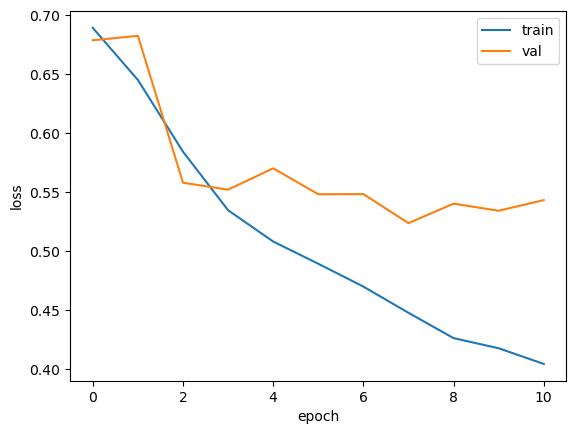

In [43]:
# 훈련 손실과 검증 손실을 그래프로 출력

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()